# Pythonにおける時系列分析の実装の仕方
時系列分析でいろいろ試してみたメモ。
実際にコンペの際にfacebookの開発したprophetというのを使ってみたので、それの使い方とSARIMAモデルの実装の仕方などをメモしておく。
データはkaggleのStore Item Demand Forecasting Challengeから取得。  
そのまま使うと、店ごと商品ごとに時系列データがあるので、勉強用にshop_id=1 & item_id=1の時系列データのみを抽出して作業していく。

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import matplotlib.pyplot as plt

test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

## fbprophetを使用してみる

In [3]:
#prophetでは、項目名を日付→"ds"/データ→"y"とする決まりとなっているので注意
train2=train.rename(columns={"date":"ds","sales":"y"})
temp=train2[(train2["store"]==1) & (train2["item"]==1)][["ds","y"]]
temp

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
5,2013-01-06,12
6,2013-01-07,10
7,2013-01-08,9
8,2013-01-09,12
9,2013-01-10,9


In [4]:
from fbprophet import Prophet

model=Prophet(yearly_seasonality=True)
model.fit(temp)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
pred=forecast["yhat"].tail(90)
#コンペティションにおいて90日後までを予測するものであるため、90となっている。

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,15.780930,2.869151,14.016920,15.780930,15.780930,-7.108353,-7.108353,-7.108353,-1.788315,-1.788315,-1.788315,-5.320039,-5.320039,-5.320039,0.0,0.0,0.0,8.672576
1,2013-01-02,15.786323,3.290253,14.719401,15.786323,15.786323,-6.453969,-6.453969,-6.453969,-1.167420,-1.167420,-1.167420,-5.286548,-5.286548,-5.286548,0.0,0.0,0.0,9.332354
2,2013-01-03,15.791716,4.713878,15.828232,15.791716,15.791716,-5.782106,-5.782106,-5.782106,-0.512023,-0.512023,-0.512023,-5.270084,-5.270084,-5.270084,0.0,0.0,0.0,10.009610
3,2013-01-04,15.797109,6.152131,17.242657,15.797109,15.797109,-4.222151,-4.222151,-4.222151,1.047915,1.047915,1.047915,-5.270066,-5.270066,-5.270066,0.0,0.0,0.0,11.574959
4,2013-01-05,15.802502,7.579103,19.145580,15.802502,15.802502,-2.282776,-2.282776,-2.282776,3.002641,3.002641,3.002641,-5.285416,-5.285416,-5.285416,0.0,0.0,0.0,13.519727
5,2013-01-06,15.807896,8.534396,19.749138,15.807896,15.807896,-1.491730,-1.491730,-1.491730,3.822875,3.822875,3.822875,-5.314606,-5.314606,-5.314606,0.0,0.0,0.0,14.316165
6,2013-01-07,15.813289,0.204586,11.963931,15.813289,15.813289,-9.761392,-9.761392,-9.761392,-4.405674,-4.405674,-4.405674,-5.355718,-5.355718,-5.355718,0.0,0.0,0.0,6.051897
7,2013-01-08,15.818682,3.142624,13.757152,15.818682,15.818682,-7.194835,-7.194835,-7.194835,-1.788315,-1.788315,-1.788315,-5.406520,-5.406520,-5.406520,0.0,0.0,0.0,8.623847
8,2013-01-09,15.824075,3.753195,15.337752,15.824075,15.824075,-6.631961,-6.631961,-6.631961,-1.167420,-1.167420,-1.167420,-5.464540,-5.464540,-5.464540,0.0,0.0,0.0,9.192115
9,2013-01-10,15.829468,4.334253,15.569164,15.829468,15.829468,-6.039172,-6.039172,-6.039172,-0.512023,-0.512023,-0.512023,-5.527149,-5.527149,-5.527149,0.0,0.0,0.0,9.790296


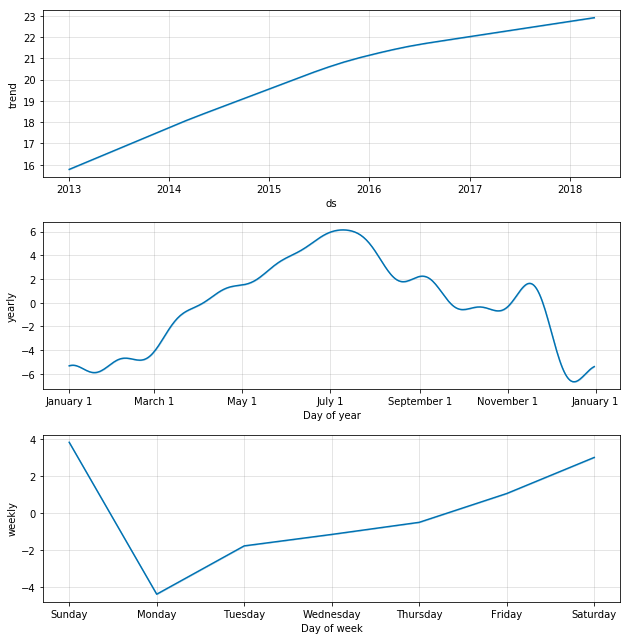

In [6]:
components=model.plot_components(forecast)

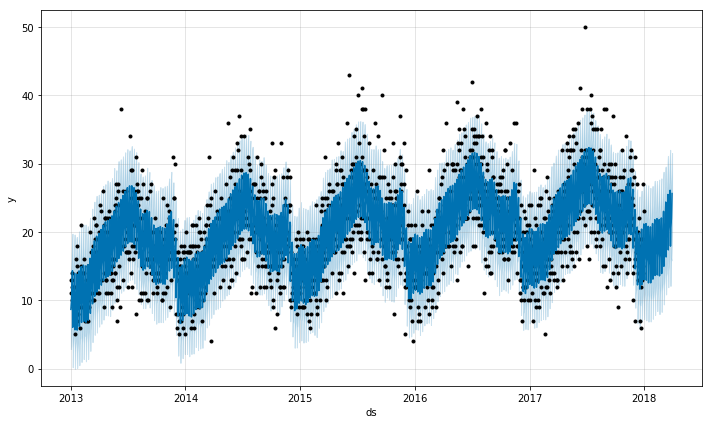

In [7]:
fore=model.plot(forecast)

## SARIMAモデルを使ってみる

In [8]:
#indexを時系列データに変換
temp2=temp.set_index("ds")
temp2.index=pd.to_datetime(temp2.index)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


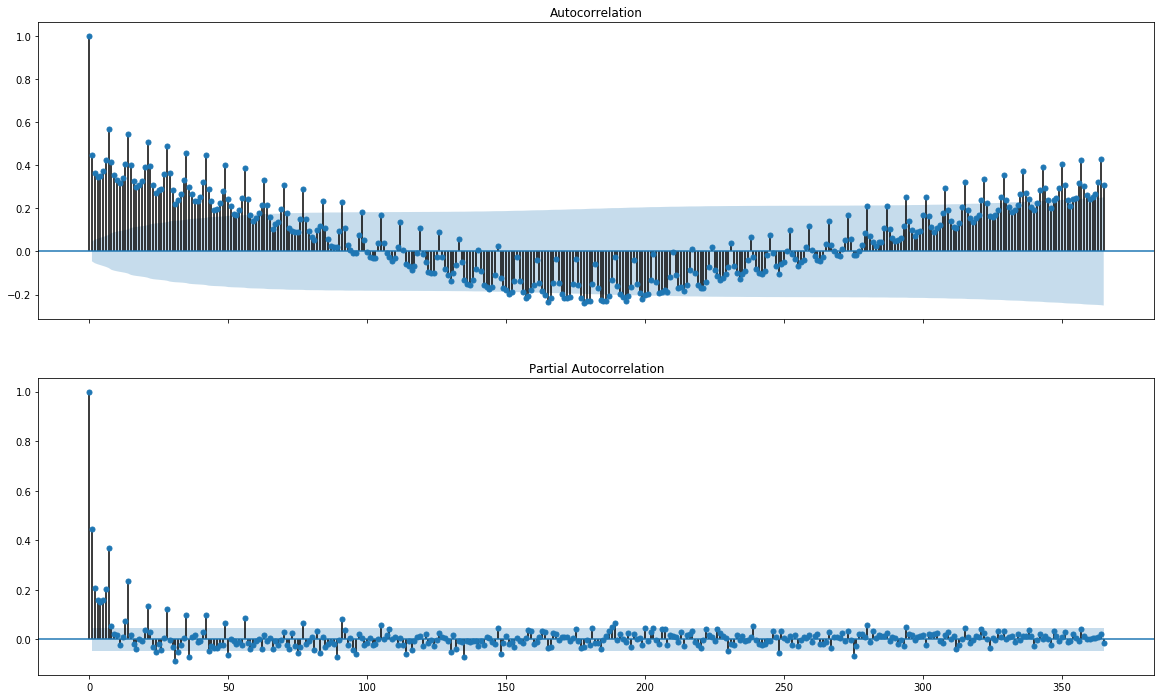

In [9]:
import statsmodels.api as sm

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,12))
acf=sm.graphics.tsa.plot_acf(temp2, lags=365,ax=ax1)
pacf=sm.graphics.tsa.plot_pacf(temp2, lags=365,ax=ax2)

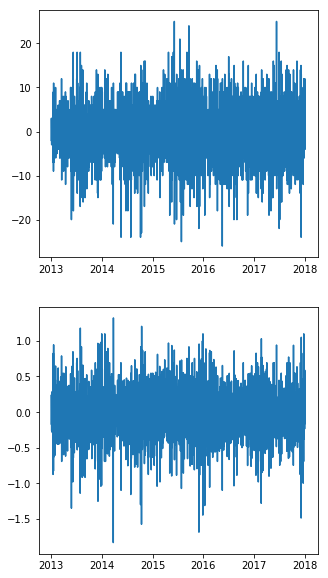

In [10]:
import matplotlib.pyplot as plt

#差分系列
dif=temp2.diff().dropna()
#対数差分系列
log_dif=(np.log(temp2)-np.log(temp2.shift())).dropna()

# グラフ
plt.figure(figsize=(5, 10))

plt.subplot(2,1,1)
plt.plot(dif)

plt.subplot(2,1,2)
plt.plot(log_dif)


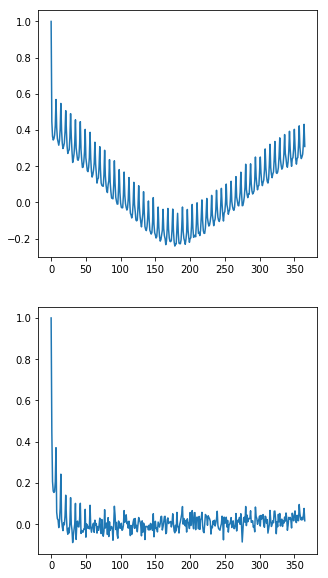

In [11]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(temp2, nlags=365)

# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(temp2, nlags=365, method='ols')

# グラフ
plt.figure(figsize=(5, 10))

plt.subplot(2,1,1)
plt.plot(ts_acf)

plt.subplot(2,1,2)
plt.plot(ts_pacf)

In [12]:
from statsmodels.tsa import stattools as st

data=[temp2["y"],dif["y"],log_dif["y"]]

for i in data:
    result=st.adfuller(i)
    print(result)

(-3.1576705563328105, 0.022569380626571107, 23, 1802, {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}, 10896.776833317934)
(-12.676793886047443, 1.2109276320438636e-23, 22, 1802, {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}, 10899.545399393755)
(-12.596289057013065, 1.7758578044130448e-23, 22, 1802, {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}, 450.81930898295104)


### adfuller検定について
上で返ってきた値はそれぞれ  
- 1 検定統計量  
- 2 p値  
- 3 使ったlagの数  
- 4 オブザベーション数  
- 5 critical value(辞書形式) これでそれぞれの有意水準におけるcritical value と「1」の検定統計量を比較して帰無仮説(=単位根あり)を棄却できるかどうかを判断する。(実際は2のp値を見れば良い)  
- 6 不明
となっている。  
※6についてはわかり次第追記

In [24]:
#原系列も差分系列も対数差分系列も非定常過程となったので(少なくとも有意水準1%では)、定常過程になるまで差分をとってみる。

temp3=temp2
for cnt in range(20):
    result=st.adfuller(temp3["y"])
    print(result)
    if result[1]<=0.01:
        print("cnt=",cnt)
        break
    temp3=temp3.diff().dropna()
        

(-3.1576705563328105, 0.022569380626571107, 23, 1802, {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}, 10896.776833317934)
(-12.676793886047443, 1.2109276320438636e-23, 22, 1802, {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}, 10899.545399393755)
cnt= 1


In [25]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(temp3, ic='aic', trend='nc')
resDiff

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/

{'aic':               0             1             2
 0           NaN  11345.276495  11337.498301
 1  11963.116967  11338.751637           NaN
 2  11805.944689  11331.497990  11305.089593
 3  11701.431905  11315.112654  11295.445823
 4  11616.440559  11295.765922  11285.710385, 'aic_min_order': (4, 2)}

In [29]:
# P=4, q=2 が最善となったので、それをモデル化
#ARIMAモデルの推計の際、データの型はintだとエラーになった。floatに変換する必要があるようなので注意。
from statsmodels.tsa.arima_model import ARIMA
ARIMA_4_1_2 = ARIMA(temp3["y"].astype(np.float64), order=(4, 1, 2)).fit(dist=False)
ARIMA_4_1_2.params

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [30]:
# ARIMA(4, 1, 2)は上記のように反転可能ではないらしく、エラーとなる。
#変わりにARIMA(4, 0, 2)を推計する。
ARIMA_4_0_2 = ARIMA(temp3["y"].astype(np.float64), order=(4, 0, 2)).fit(dist=False)
ARIMA_4_0_2.params

const      0.003386
ar.L1.y    0.338502
ar.L2.y   -0.141205
ar.L3.y   -0.104736
ar.L4.y   -0.110662
ma.L1.y   -1.206652
ma.L2.y    0.319075
dtype: float64

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


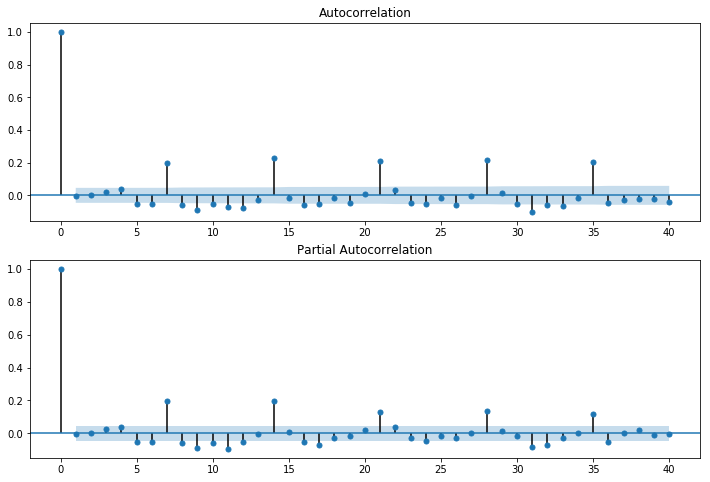

In [31]:
# 残差のチェック
# SARIMAじゃないので、周期性が残ってしまっている。。。
resid = ARIMA_4_0_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [46]:
# SARIMAモデルを推定する
import statsmodels.api as sm

SARIMA_4_1_2_111 = sm.tsa.SARIMAX(temp2["y"].astype(np.float64), order=(4,1,2), seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()
print(SARIMA_4_1_2_111.summary())

#enforce_stationarity=False,enforce_invertibility=Falseを入れないとエラーになる→定常でもないし反転可能でもないということだと思われる。
#このモデルによる推計結果は信頼できるものではない可能性がある。
#temp2の一階差分(=temp3)は有意水準1%で非定常を棄却できていたので、非定常じゃないことによるエラーがでる理由がよくわからない。要注意。

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1826
Model:             SARIMAX(4, 1, 2)x(1, 1, 1, 12)   Log Likelihood               -5590.076
Date:                            Sun, 14 Oct 2018   AIC                          11198.152
Time:                                    07:52:08   BIC                          11247.741
Sample:                                01-01-2013   HQIC                         11216.444
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6651      0.122     -5.462      0.000      -0.904      -0.426
ar.L2         -0.0705      0.036   

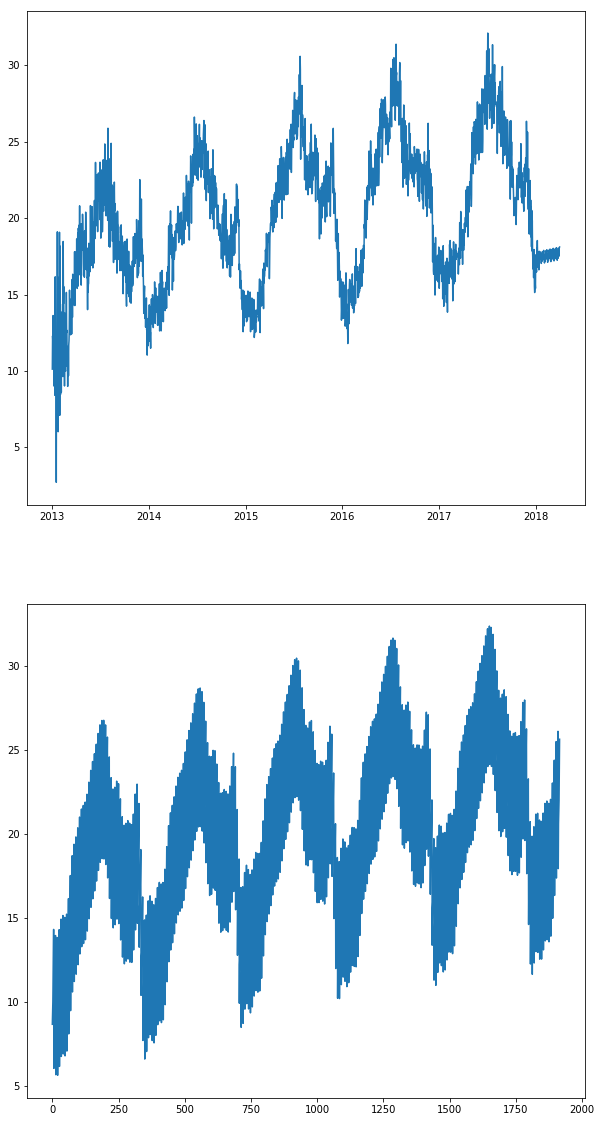

In [49]:
#SARIMAモデルとprophetの比較

SARIMA=SARIMA_4_1_2_111.predict(start=1,end="2018-03-31")
prophet=forecast["yhat"]

# グラフ
plt.figure(figsize=(10, 20))

plt.subplot(2,1,1)
plt.plot(SARIMA)

plt.subplot(2,1,2)
plt.plot(prophet)

## 最後に
prophetとSARIMAモデルを使用してみた。  
使い方はだいたいわかったが、挙動に関してはまだよくわからないところが多い(特にSARIMA)    
SARIMAは今後も使うことがあると思うので、いろいろわかり次第追記することとする。   
また、prophetについて、自動でSARIMAモデルなどを行っているものだと思っていたが、どうやらベイズ時系列モデルを使っているらしい。  
概要はさておき、時系列データをyt=g(t)+h(t)+s(t)+εtとモデル化して、ベイズ推計を行っているとのこと。  
※g(t)は成長関数を表し、いわばトレンドである。デフォルトでは線形トレンドだが、ロジスティック関数も選べる。またh(t)は 休日効果でs(t)は季節要素とのこと。  

SARIMAについては、定常性の確認などを行ったがSARIMA推計の際において文句を言われてしまった。  
したがって、正しく推計できているかは微妙である。上の図グラフで比較している通り、予測箇所(20180101から90日分)については、少し違いが出てしまっているのがわかる。(prophetのほうが大きな値)  

あとはいろいろ試しつつ身に着けていきたい。  
詳しくわかってきたら、改めて同じデータを用いて手法による違いを確認していきたい。